1. 웹 스크래핑 가능 유무 확인하기
- 웹 브라우저 없이 웹 정보 확인하기

In [1]:
#웹 스크래핑 가능 유무 확인을 위한 모듈 탑재
import requests

#웹 스크래핑 대상 주소 저장 - 네이버
url = 'https://finance.naver.com/item/sise_day.naver?code=035420&page=2'

#HTTP 요청을 대상 주소로 보내고, HTTP 응답 받아서 저장하기
page = requests.get(url)

#응답 내용 확인하기
print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

- 요청 헤더에 값 설정 후 웹 정보 확인하기
- 문제: 
  - 소스 코드에 웹 브라우저에서 요청할 때 설정한 값을 입력하기 않았기 때문에 발생함
  - '웹 브라우저에서 보낸 요청이다' 라는 의미의 user-agent 값을 요청 헤더에 설정하기
- 소스 코드 실행
- requests.get() 메소드에 headers 인수를 추가 -> user-agent를 설정
  - 앞에서 실행한 결과와는 다른 HTML 페이지 내용을 확인할 수 있음


In [2]:
#헤더 정보 설정하기
my_headers = {'user-agent' : 'Mozilla/5.0'}

#요청 헤더 설정하여 HTTP 응답 받아오기
page = requests.get(url, headers = my_headers)

#응답 내용 확인하기
print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/newstock3.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/world.css">
</head>
<body>
<script language="JavaS

※ CHECK! 웹 스크래핑이 가능한지 반드시 확인하세요
- 웹 페이지에서 데이터가 보이니 소스 코드로 데이터 수집이 가능한지 확인하지 않고 바로 웹 스크래핑을 수행 하는 경우가 많습니다.
  - →웹 페이지에서 보이는 페이지 내용과 소스 코드를 실행해 얻은 페이지 내용이 다른 경우, 작
성한 소스 코드가 의도한 대로 동작하지 않아 낭패를 보는 경우가 빈번합니다. 
- 원하는 정보를 가져오지못하는 이유가 소스 코드 실수 때문이라고 오해하고 문제를 찾는 데 많은 시간을 소모할 수도 있습니다. 
  - →따라서, 웹 스크래핑을 본격적으로 수행하기 전에 반드시 소스 코드로 데이터를 제대로 가져올 수 있는지 확인하기 바랍니다

2. 웹 데이터 수집하기
- HTML table 데이터 가져오기
- 판다스의 read_html() 메서드 사용
  - 인수 : HTTP 응답 내용을 확인할 때 사용 했던 HTML 페이지의 텍스트(page.text)를 넣으면 됨
- 다음 소스 코드를 실행
  - →read_html() 메서드가 반환하는 객체(pages)의 데이터 타입을 판다스 type() 함수로 확인
  - →read_html() 메서드는 HTML 테이블을 읽어 데이터프레임 객체로 구성된 리스트를 반환함

In [3]:
#판다스 라이브러리 탑재
import pandas as pd

#HTML 페이지에서 테이블 추출
pages = pd.read_html(page.text)

#추출한 데이터 타입 확인하기
type(pages)

list

In [4]:
#페이지 개수 확인하기
#len()함수 -> 리스트의 데이터프레임 객체 개수 확인

len(pages)

#웹 페이지의 데이터 테이블 개수 : 1개
#함수로 확인한 데이터 테이블 개수 : 2개
#개수가 차이나는 이유? 항목 2개의 값을 차례로 살펴보기

2

In [5]:
#첫 번째 테이블 내용 확인하기
pages[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.05.11,211000.0,1000.0,213000.0,216000.0,210500.0,825757.0
2,2023.05.10,210000.0,1000.0,211000.0,212500.0,206500.0,763447.0
3,2023.05.09,211000.0,4000.0,209000.0,214500.0,208500.0,1855368.0
4,2023.05.08,207000.0,10900.0,200500.0,207500.0,198200.0,2034862.0
5,2023.05.04,196100.0,3500.0,191100.0,197300.0,189000.0,900385.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.05.03,192600.0,600.0,191800.0,193400.0,191300.0,448203.0


In [6]:
#두 번째 테이블 내용 확인하기
pages[1]

#첫 번째 항목을 출력한 결과 : 우리가 찾던 데이터
#두 번째 항목을 출력한 결과 : 테이블 밑에 있는 페이지 바
#눈에 보이는 테이블 이외에도 HTML에<table> 태그가 쓰인 곳이 여러 곳일 수 있음
#어떤 항목의 데이터프레임이 원하는 데이터인지 반드시 확인해야 함

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,맨앞,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


3. 웹 페이지 URL 분석하기
- 페이징(Paging) 처리
- 데이터를 여러 페이지로 나누어 출력하도록 설정하는 것을 의미
- 너무 많은 데이터를 한 번에 보여줄 때 발생하는 일
  - →페이지 로딩 시간이 길어질 수 있으며, 자원이 부족해 오류가 발생할 수도 있음
  - →주식 일별 시세와 같이 오랫동안 축적한 데이터는 한 페이지에 제한된 개수의 데이터만 보여
주는 것이 일반적임

4. 페이징 처리가 되어 있는 데이터 수집하기
- 페이지 번호 증가용 반복문 작성
- 페이지 번호를 제외한 나머지 부분을 저장한 새로운 변수 : new_url 생성
- 반복문을 순회하면서 추출한 테이블 정보를 축적할 데이터 프레임 : all_tables 생성

In [7]:
#페이지 번호를 제외한 주소 저장
new_url = "https://finance.naver.com/item/sise_day.naver?code=035420&page="

#데이터를 축적할 데이터프레임 생성
all_tables=pd.DataFrame()

In [8]:
#페이지 버호 증가용 반복문
for page_number in range(1,2):
  
  #페이지 번호 추가한 주소 완성
  full_url = new_url + str(page_number)

  #주소 확인하기
  print(f'{page_number} 번째 페이지 읽어오기({full_url})')

  #HTTP 요청 전송 후 응답 받아오기
  page = requests.get(full_url, headers = my_headers)

  #테이블 추출
  table = pd.read_html(page.text)[0]

  #수행할 내용 확인
  print(f'전체{len(all_tables.index)} 줄 에 {len(table.index)} 줄 추가')

  #데이터 축적용 데이터프레임에 테이블 추가
  all_tables = pd.concat([all_tables, table])


1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=035420&page=1)
전체0 줄 에 15 줄 추가


In [9]:
#전체 테이블 결과 확인
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.05.25,206000.0,3000.0,202500.0,207500.0,202500.0,789599.0
2,2023.05.24,203000.0,9000.0,208000.0,209500.0,202500.0,1210194.0
3,2023.05.23,212000.0,3000.0,215500.0,216000.0,211500.0,550247.0
4,2023.05.22,215000.0,1500.0,215500.0,218000.0,214000.0,534887.0
5,2023.05.19,216500.0,4000.0,214000.0,217000.0,212500.0,870698.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.05.18,212500.0,500.0,213500.0,214000.0,210000.0,378470.0


In [10]:
#결손치 제거
all_tables.dropna(inplace=True)

#데이터 확인하기
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.05.25,206000.0,3000.0,202500.0,207500.0,202500.0,789599.0
2,2023.05.24,203000.0,9000.0,208000.0,209500.0,202500.0,1210194.0
3,2023.05.23,212000.0,3000.0,215500.0,216000.0,211500.0,550247.0
4,2023.05.22,215000.0,1500.0,215500.0,218000.0,214000.0,534887.0
5,2023.05.19,216500.0,4000.0,214000.0,217000.0,212500.0,870698.0
9,2023.05.18,212500.0,500.0,213500.0,214000.0,210000.0,378470.0
10,2023.05.17,213000.0,5500.0,207500.0,214000.0,207500.0,538104.0
11,2023.05.16,207500.0,4500.0,212500.0,213500.0,207000.0,528940.0
12,2023.05.15,212000.0,1500.0,212000.0,213500.0,207500.0,584184.0
13,2023.05.12,213500.0,2500.0,212000.0,214000.0,210000.0,666880.0


In [11]:
#데이터를 축적할 데이터프레임 생성
all_tables=pd.DataFrame()

#페이지 번호 증가용 반복문
for page_number in range(1,11):

  #페이지 번호 추가한 주소 완성
  full_url = new_url + str(page_number)

  #주소 확인하기
  print(f'{page_number} 번째 페이지 읽어오기{full_url}')

  #HTTP 요청 전송 후 응답 받아오기
  page = requests.get(full_url, headers = my_headers)

  #테이블 추출
  table = pd.read_html(page.text)[0]

  #수행할 내용 확인
  print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')

  #데이터 축적용 데이터프레임에 테이블 추가
  all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기https://finance.naver.com/item/sise_day.naver?code=035420&page=1
전체 0 줄에 15 줄 추가
2 번째 페이지 읽어오기https://finance.naver.com/item/sise_day.naver?code=035420&page=2
전체 15 줄에 15 줄 추가
3 번째 페이지 읽어오기https://finance.naver.com/item/sise_day.naver?code=035420&page=3
전체 30 줄에 15 줄 추가
4 번째 페이지 읽어오기https://finance.naver.com/item/sise_day.naver?code=035420&page=4
전체 45 줄에 15 줄 추가
5 번째 페이지 읽어오기https://finance.naver.com/item/sise_day.naver?code=035420&page=5
전체 60 줄에 15 줄 추가
6 번째 페이지 읽어오기https://finance.naver.com/item/sise_day.naver?code=035420&page=6
전체 75 줄에 15 줄 추가
7 번째 페이지 읽어오기https://finance.naver.com/item/sise_day.naver?code=035420&page=7
전체 90 줄에 15 줄 추가
8 번째 페이지 읽어오기https://finance.naver.com/item/sise_day.naver?code=035420&page=8
전체 105 줄에 15 줄 추가
9 번째 페이지 읽어오기https://finance.naver.com/item/sise_day.naver?code=035420&page=9
전체 120 줄에 15 줄 추가
10 번째 페이지 읽어오기https://finance.naver.com/item/sise_day.naver?code=035420&page=10
전체 135 줄에 15 줄 추가


In [12]:
#결손치 제거
all_tables.dropna(inplace=True)

#데이터 확인하기
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.05.25,206000.0,3000.0,202500.0,207500.0,202500.0,789599.0
2,2023.05.24,203000.0,9000.0,208000.0,209500.0,202500.0,1210194.0
3,2023.05.23,212000.0,3000.0,215500.0,216000.0,211500.0,550247.0
4,2023.05.22,215000.0,1500.0,215500.0,218000.0,214000.0,534887.0
5,2023.05.19,216500.0,4000.0,214000.0,217000.0,212500.0,870698.0
...,...,...,...,...,...,...,...
9,2023.01.05,186000.0,3500.0,184500.0,190000.0,184000.0,1107483.0
10,2023.01.04,182500.0,4000.0,177000.0,183500.0,177000.0,792920.0
11,2023.01.03,178500.0,1000.0,177000.0,179500.0,173500.0,573137.0
12,2023.01.02,179500.0,2000.0,179500.0,180000.0,176000.0,438162.0


<데이터 시각화>
- 상자 수염 그래프(Box-and-whisker plot)
- boxplot() 메서드를 사용
  - →일일 시세 데이터를 월별로 취합→ 상자 수염 그래프에 다섯 가지 요약 수치를 표현하는 방식
으로 시각화 진행

- 시각화 대상 데이터 추출하기
  - 한글 열 이름을 영문으로 추출하기
  - rename() 메서드
  - →데이터를 안전하게 처리하고 시각화→ 필요한 열 이름만 영문으로 변경

In [13]:
#열 이름 영문으로 변경
all_tables.rename(columns={'날짜' : 'date',
                           '종가' : 'end_price',
                           '시가' : 'start_price',
                           '고가' : 'highest_price',
                           '저가' : 'lowest_price'},
                  inplace = True)

#데이터 확인하기
all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.05.25,206000.0,3000.0,202500.0,207500.0,202500.0,789599.0
2,2023.05.24,203000.0,9000.0,208000.0,209500.0,202500.0,1210194.0
3,2023.05.23,212000.0,3000.0,215500.0,216000.0,211500.0,550247.0
4,2023.05.22,215000.0,1500.0,215500.0,218000.0,214000.0,534887.0
5,2023.05.19,216500.0,4000.0,214000.0,217000.0,212500.0,870698.0
...,...,...,...,...,...,...,...
9,2023.01.05,186000.0,3500.0,184500.0,190000.0,184000.0,1107483.0
10,2023.01.04,182500.0,4000.0,177000.0,183500.0,177000.0,792920.0
11,2023.01.03,178500.0,1000.0,177000.0,179500.0,173500.0,573137.0
12,2023.01.02,179500.0,2000.0,179500.0,180000.0,176000.0,438162.0


In [14]:
#필요 없는 열 제거
all_tables.drop(['전일비','거래량'], axis=1, inplace=True)

#데이터 확인하기
all_tables

,date,end_price,start_price,highest_price,lowest_price
1,2023.05.25,206000.0,202500.0,207500.0,202500.0
2,2023.05.24,203000.0,208000.0,209500.0,202500.0
3,2023.05.23,212000.0,215500.0,216000.0,211500.0
4,2023.05.22,215000.0,215500.0,218000.0,214000.0
5,2023.05.19,216500.0,214000.0,217000.0,212500.0
...,...,...,...,...,...
9,2023.01.05,186000.0,184500.0,190000.0,184000.0
10,2023.01.04,182500.0,177000.0,183500.0,177000.0
11,2023.01.03,178500.0,177000.0,179500.0,173500.0
12,2023.01.02,179500.0,179500.0,180000.0,176000.0


In [15]:
#중앙값 열 추가
all_tables['median_price'] = all_tables['highest_price'] - ((all_tables['highest_price'] - all_tables['lowest_price']) / 2)

#값 확인하기
all_tables

,date,end_price,start_price,highest_price,lowest_price,median_price
1,2023.05.25,206000.0,202500.0,207500.0,202500.0,205000.0
2,2023.05.24,203000.0,208000.0,209500.0,202500.0,206000.0
3,2023.05.23,212000.0,215500.0,216000.0,211500.0,213750.0
4,2023.05.22,215000.0,215500.0,218000.0,214000.0,216000.0
5,2023.05.19,216500.0,214000.0,217000.0,212500.0,214750.0
...,...,...,...,...,...,...
9,2023.01.05,186000.0,184500.0,190000.0,184000.0,187000.0
10,2023.01.04,182500.0,177000.0,183500.0,177000.0,180250.0
11,2023.01.03,178500.0,177000.0,179500.0,173500.0,176500.0
12,2023.01.02,179500.0,179500.0,180000.0,176000.0,178000.0


In [16]:
#월 정보 열 추가
all_tables['month'] = all_tables['date'].str[0:7]

#값 확인하기
all_tables

,date,end_price,start_price,highest_price,lowest_price,median_price,month
1,2023.05.25,206000.0,202500.0,207500.0,202500.0,205000.0,2023.05
2,2023.05.24,203000.0,208000.0,209500.0,202500.0,206000.0,2023.05
3,2023.05.23,212000.0,215500.0,216000.0,211500.0,213750.0,2023.05
4,2023.05.22,215000.0,215500.0,218000.0,214000.0,216000.0,2023.05
5,2023.05.19,216500.0,214000.0,217000.0,212500.0,214750.0,2023.05
...,...,...,...,...,...,...,...
9,2023.01.05,186000.0,184500.0,190000.0,184000.0,187000.0,2023.01
10,2023.01.04,182500.0,177000.0,183500.0,177000.0,180250.0,2023.01
11,2023.01.03,178500.0,177000.0,179500.0,173500.0,176500.0,2023.01
12,2023.01.02,179500.0,179500.0,180000.0,176000.0,178000.0,2023.01


In [17]:
#날짜를 색인으로 지정하기
all_tables.set_index('date', inplace=True)

#날짜 오름차순으로 정렬하기
all_tables.sort_index(inplace=True)

#값 확인하기
all_tables

,end_price,start_price,highest_price,lowest_price,median_price,month
date,,,,,,
2022.12.29,177500.0,180000.0,185000.0,177500.0,181250.0,2022.12
2023.01.02,179500.0,179500.0,180000.0,176000.0,178000.0,2023.01
2023.01.03,178500.0,177000.0,179500.0,173500.0,176500.0,2023.01
2023.01.04,182500.0,177000.0,183500.0,177000.0,180250.0,2023.01
2023.01.05,186000.0,184500.0,190000.0,184000.0,187000.0,2023.01
...,...,...,...,...,...,...
2023.05.19,216500.0,214000.0,217000.0,212500.0,214750.0,2023.05
2023.05.22,215000.0,215500.0,218000.0,214000.0,216000.0,2023.05
2023.05.23,212000.0,215500.0,216000.0,211500.0,213750.0,2023.05


- 그래프 그리기

<Axes: xlabel='date'>

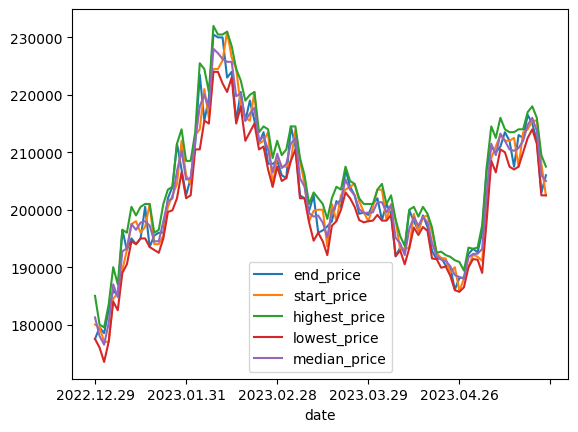

In [18]:
#전체 숫자 데이터 선 그래프로 그리기
#지금까지 준비한 데이터가 시각화 목적에 맞게 가공되었는지 확인
all_tables.plot.line()

<Axes: xlabel='date'>

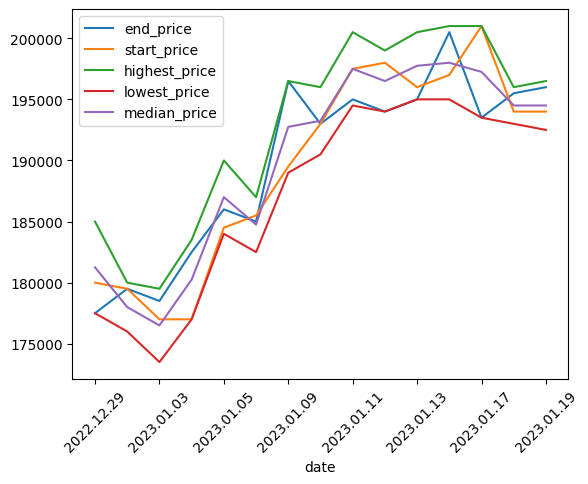

In [19]:
#앞 15일치 데이터 선 그래프로 그리기
#슬라이싱으로 앞 15개 데이터만 선택하고, x축 라벨은 45도 돌려서 표현
all_tables[:15].plot.line(rot=45)

<Axes: title={'center': 'median_price'}, xlabel='[month]'>

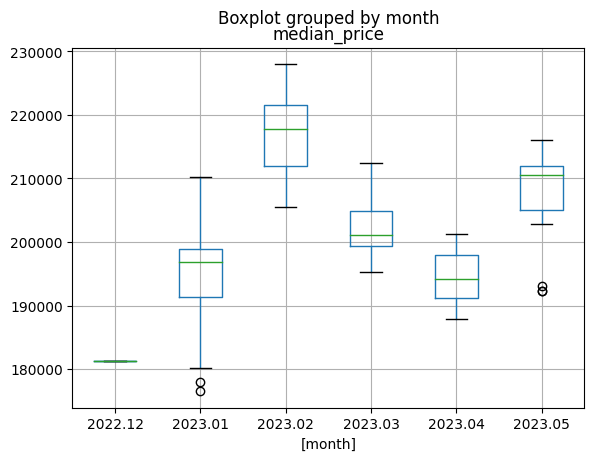

In [20]:
#상자 수염 그래프
#전체 데이터를 월 단위로 집계→ 중앙값의 월 단위 최댓값, 최솟값, 중앙값 확인

#일일 시세 중앙값의 박스 수염 그래프 그리기
all_tables.boxplot(column=['median_price'], by=['month'])

- boxplot: 상자 수염 그래프를 그리기 위해 데이터프레임의 boxplot() 메서드 사용
  - →지금까지 사용한 plot() 메서드와는 다른 메서드임
-‘midian_price’: 그래프를 그릴 열을 선택
  - →인수 column에 midian_price 열을 설정함
-‘month’: 월 단위로 데이터를 집계
  - →by 인수에 month 열의 값을 설정